In [34]:
## Task-1

#importing the required libraries
import pandas as pd
import os
from IPython.display import Image

#importing the input data
data_df = pd.read_csv(os.path.join('warm-up', 'task-1.csv'))
data_df.head()

x       y
0  10.529  39.105
1  10.799  40.584
2  11.698  39.883
3  12.851  39.411
4  13.565  40.760

In [32]:
#putting data columns into arrays
X = data_df.x.values
y = data_df.y.values

array([3.588, 3.551, 3.61 , 3.704, 3.716, 3.604, 3.731, 3.707, 3.74 ,
       3.796, 3.813, 3.909, 3.905, 3.904, 3.951, 3.976, 4.064, 4.01 ,
       4.067, 4.039, 3.985, 4.176, 4.217, 4.167, 4.348, 4.193, 4.298,
       4.317, 4.434, 4.461, 4.426, 4.468, 4.435, 4.411, 4.523, 4.579,
       4.664, 4.693, 4.644, 4.679, 4.672, 4.684, 4.7  , 4.914, 4.821,
       4.856, 4.846, 4.978, 4.889, 4.989])

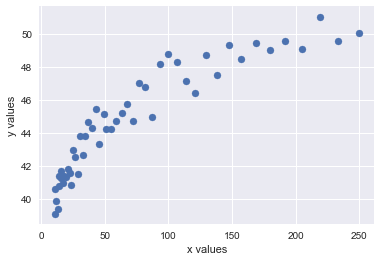

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

# Set style to Seaborn
sns.set()

# Get a few colors from Seaborn default color palette
blue, green, red = sns.color_palette()[:3]


# Plot data points
plt.scatter(X, y)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

a: 3.3902409977137973
b: 31.529201219296148


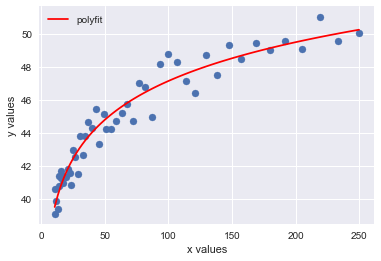

In [4]:
import numpy as np

coefs = np.polyfit(np.log(X), y, deg=1)
x_values = np.linspace(X.min(), X.max(), num=100)
y_values = np.polyval(coefs, np.log(x_values))
a, b = coefs

print('a:', a) 
print('b:', b)

# Plot fitted line
plt.scatter(X, y)
plt.plot(x_values, y_values, color='red', label='polyfit')
plt.legend()
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [33]:
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))

y_pred = np.polyval(coefs, np.log(X))
rss_baseline = RSS(y, y.mean())
rss_model = RSS(y, y_pred)
R2 = 1 - (rss_model / rss_baseline)
print('R^2 coefficient:', R2)

R^2 coefficient: -3237.8500870582952


## 4th question
Q: Explain how the polyfit() function finds the optimal parameters (1-2 sentences)

A:
The solution minimizes the squared error:
![](error.png)
in the equations:
![](equations.png)

The method finds the values in the 'p matrix' using closed form solving.

## 5th question

Q:Give two differences between this method and the gradient descent one. Write a short sentence for each one.

A: The polyfit() function uses ordinary least squares (OLS) which is a closed-form solution, while the gradient search utilizes an initial stimation which incrementally moves towards the optimum solution. The calculation cost of the gradient descent method is lower than the OLS.

In [6]:
## Task-2

data_df = pd.read_csv(os.path.join('warm-up', 'task-2.csv'))
data_df.head()

x1       x2       x3         y
0   7.892  318.818  162.970  2112.420
1   8.830  303.180  181.399  2096.231
2  13.811  296.231  145.849  2067.045
3  12.863  325.830  167.996  2269.262
4  13.698  254.035  171.892  1966.604

In [7]:
X= data_df.drop('y', axis=1).values
print('X:', X.shape)
# Extract target vector y
y = data_df.y.values
print('y:', y.shape)

X: (1000, 3)
y: (1000,)


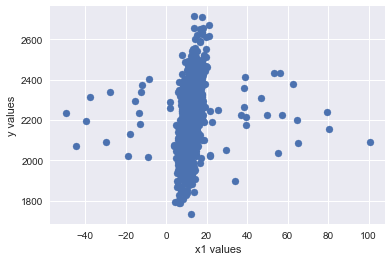

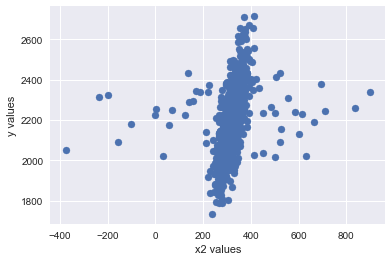

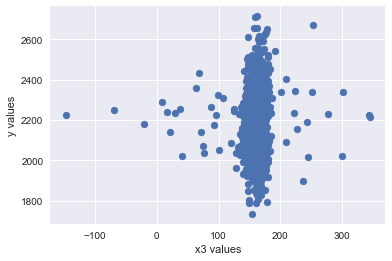

In [8]:
# Plot data points
plt.scatter(X[:,0], y)
plt.xlabel('x1 values')
plt.ylabel('y values')
plt.show()

plt.scatter(X[:,1], y)
plt.xlabel('x2 values')
plt.ylabel('y values')
plt.show()

plt.scatter(X[:,2], y)
plt.xlabel('x3 values')
plt.ylabel('y values')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
train_df, test_df = train_test_split(
    data_df, train_size=0.8, test_size=0.2, random_state=0)

print('Train DataFrame:', train_df.shape)
print('Test DataFrame:', test_df.shape)

Train DataFrame: (800, 4)
Test DataFrame: (200, 4)


In [10]:
X_tr = train_df.drop('y', axis=1).values
y_tr = train_df.y.values

X_te = test_df.drop('y', axis=1).values
y_te = test_df.y.values

In [11]:
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

from sklearn.linear_model import LinearRegression

# Linear regression
lr = LinearRegression()
lr.fit(X_tr, y_tr)
y_pred_lr = np.maximum(
    lr.predict(X_te), 
    50
)
mae_lr = MAE(y_te, y_pred_lr)
print('MAE linear regression: {:.3f}'.format(mae_lr))

MAE linear regression: 104.788


z-scores1: (800,)


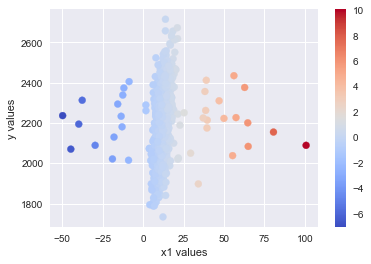

In [12]:
z_scores1 = ((X_tr[:,0]) - (X_tr[:,0]).mean()) / (X_tr[:,0]).std()

print('z-scores1:', z_scores1.shape)
# Plot z-scores
plt.scatter((X_tr[:,0]), y_tr, c=z_scores1, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('x1 values')
plt.ylabel('y values')
plt.show()

In [13]:
idx = ((z_scores1 < -1) | (z_scores1 > 1))
X_tr_1, y_tr_1 = X_tr[~idx], y_tr[~idx]
print('X_1:', X_tr_1.shape)
print('y_1:', y_tr_1.shape)

X_1: (760, 3)
y_1: (760,)


z-scores2: (760,)


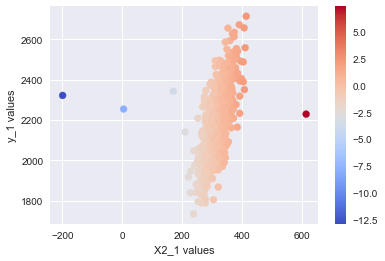

In [14]:
z_scores2 = ((X_tr_1[:,1]) - (X_tr_1[:,1]).mean()) / (X_tr_1[:,1]).std()

print('z-scores2:', z_scores2.shape)
# Plot z-scores
plt.scatter((X_tr_1[:,1]), y_tr_1, c=z_scores2, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('X2_1 values')
plt.ylabel('y_1 values')
plt.show()

In [15]:
idx = ((z_scores2 < -2) | (z_scores2 > 3))
X_tr_2, y_tr_2 = X_tr_1[~idx], y_tr_1[~idx]
print('X_2:', X_tr_2.shape)
print('y_2:', y_tr_2.shape)

X_2: (752, 3)
y_2: (752,)


z-scores3: (752,)


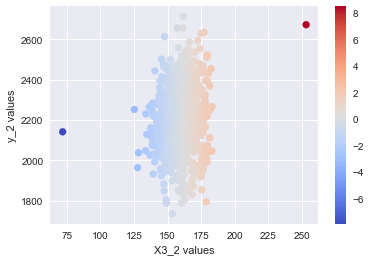

In [16]:
z_scores3 = ((X_tr_2[:,2]) - (X_tr_2[:,2]).mean()) / (X_tr_2[:,2]).std()

print('z-scores3:', z_scores3.shape)
# Plot z-scores
plt.scatter((X_tr_2[:,2]), y_tr_2, c=z_scores3, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('X3_2 values')
plt.ylabel('y_2 values')
plt.show()

In [17]:
idx = ((z_scores3 < -3) | (z_scores3 > 5))
X_tr_3, y_tr_3 = X_tr_2[~idx], y_tr_2[~idx]
print('X_3:', X_tr_3.shape)
print('y_3:', y_tr_3.shape)

X_3: (749, 3)
y_3: (749,)


In [18]:
lr.fit(X_tr_3, y_tr_3)
y_pred_lr = np.maximum(
    lr.predict(X_te), 
    50
)
mae_lr = MAE(y_te, y_pred_lr)
print('MAE linear regression: {:.3f}'.format(mae_lr))

MAE linear regression: 70.884


In [19]:
from sklearn.linear_model import HuberRegressor

# Huber loss
huber = HuberRegressor(epsilon=1.45)
huber.fit(X_tr, y_tr) # Fit to train data
y_pred_huber = np.maximum(
    huber.predict(X_te), # Predictions for test data
    50 # set a lower limit
)
mae_huber = MAE(y_te, y_pred_huber)
print('MAE Huber: {:.3f}'.format(mae_huber))

MAE Huber: 87.110


In [20]:
## Task-3

data_df = pd.read_csv(os.path.join('warm-up', 'task-3.csv'))
data_df.head()

x      y
0  3.588  0.473
1  3.551  0.784
2  3.610  0.847
3  3.704  0.904
4  3.716  1.118

In [21]:
X = data_df.x.values
y = data_df.y.values

In [22]:
from sklearn.preprocessing import PolynomialFeatures

pf_obj = PolynomialFeatures(degree=10, include_bias=False)
X_poly = pf_obj.fit_transform(X[:, np.newaxis])

# Split intro train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X_poly, y, train_size=0.5, test_size=0.5, random_state=0)

print('Train set:', X_tr.shape, y_tr.shape)
print('Test set:', X_te.shape, y_te.shape)

Train set: (25, 10) (25,)
Test set: (25, 10) (25,)


RSS for train set: 59517.884057999996
RSS for test set: 60065.208844


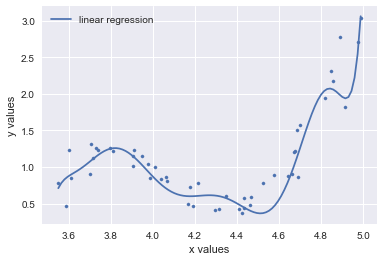

In [23]:
lr = LinearRegression()
lr.fit(X_tr, y_tr)

def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

y_tr_pred_lr = np.maximum(
    lr.predict(X_tr), # Predictions for test data
    50 # set a lower limit
)

y_te_pred_lr = np.maximum(
    lr.predict(X_te), # Predictions for test data
    50 # set a lower limit
)

rss_lr_tr = RSS(y_tr, y_tr_pred_lr)
rss_lr_te = RSS(y_te, y_te_pred_lr)
print('RSS for train set:', rss_lr_tr)
print('RSS for test set:', rss_lr_te)

# Plot models
x_values = np.linspace(min(X), max(X), num=100)
x_values_poly = pf_obj.transform(x_values[:, np.newaxis])
y_values_lr = lr.predict(x_values_poly)

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, y, s=10)
plt.plot(x_values, y_values_lr, label='linear regression')
plt.legend()
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()
#Yes, it's overfit

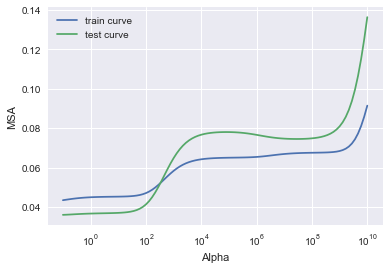

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse

# Define a set of alpha values
alphas = np.logspace(-1, 10, num=100)

# Save train/test scores
train_scores = []
test_scores = []

# Grid search
for alpha in alphas:
    # Ridge regression
    ridge = Ridge(alpha)
    ridge.fit(X_tr, y_tr)
    
    # Train score
    y_pred = ridge.predict(X_tr)
    train_scores.append(mse(y_tr, y_pred))
    
    # Test score
    y_pred = ridge.predict(X_te)
    test_scores.append(mse(y_te, y_pred))
    
# Plot validation curves
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('MSA')
plt.show()

In [25]:
# Find best alpha
idx = np.argwhere(np.isclose(test_scores, train_scores, atol=0.001)).reshape(-1)
best_alpha = alphas[idx]
best_alpha

array([359.38136638])

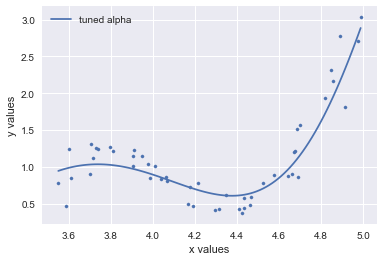

In [26]:
# Ridge regression with tuned alpha
ridge2 = Ridge(best_alpha)
ridge2.fit(X_tr, y_tr)

# Plot model
y_values_ridge = ridge2.predict(x_values_poly)

plt.scatter(X, y, s=10)
plt.plot(x_values, y_values_ridge, label='tuned alpha')
plt.legend()
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [27]:
y_tr_pred_ridge = ridge2.predict(X_tr)

y_te_pred_ridge = ridge2.predict(X_te)

rss_ridge_tr = RSS(y_tr, y_tr_pred_ridge)
rss_ridge_te = RSS(y_te, y_te_pred_ridge)
print('RSS from ridge for train set:', rss_ridge_tr)
print('RSS from ridge test set:', rss_ridge_te)

RSS from ridge for train set: 1.315110201202586
RSS from ridge test set: 1.3257646773351448
